In [1]:
# Data analysis library numpy and pandas
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.patches as mpatches

import mimetypes
import urllib
import os

from google.colab import drive	
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/Violin/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [7]:
class Violin_plot: 
  # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2   
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
        file_name_new=file_name
        if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=file_name+'_'+str(n[0])
            n[0]+=1
        if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=check_meta(file_name)
        return file_name_new
    available_name=check_meta(filename)
    return available_name

  # file: file name of your data source
  # x_col_name: ['x_column_name_a','x_column_name_b'...]
  # paper_type : 'single' or 'double'
  def Violin(self,file,x_col_name,paper_type  ,**kwargs):
    # Configuration of the box plot
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # my_font: the typeface of x, y labels
    # backgrid: backgrid of the plot
    # isframe: frame of the plot
    # gridlinewidth: grid line width
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # legend_size: size of legend
    # legend_loc: location of legend
    # x_label: the content of x label
    # y_label: the content of y label
    # palette: color palette of box plot
    # width: each violin width
    # vert: True or False, If True , makes the boxes vertical. If False, everything is drawn horizontally
    # showmeans: True or False, if true, show the mean line
    # showextra: True or False, if true, show the extra line
    # showmedian: True or False, if true, show the median line
    # quantiles: show the quantiles line
    # category: category columns of violin plot
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image
    single_column_conf={ 'plotwidth':8,
                  'plotheight':6, 
                  'my_font':'DejaVu Sans',
                  'labeltext_size':25,
                  'labelpad':10,
                  'backgrid':True,
                  'isframe':True,
                  'gridlinewidth':0.5,  
                  'title':False,
                  'title_pad':10,
                  'title_size':20,
                  'tick_size':15,
                  'title_loc':'center',
                  'legend_size': 12,
                  'legend_loc': 'upper right',
                  'x_label':None,
                  'y_label':None,
                  'palette':sns.color_palette("hls", 10),
                  'width':0.5,
                  'vert':True,
                  'showmeans':False,
                  'showextrema':True,
                  'showmedians':True,
                  'quantiles':None,
                  'category':None,
                  'x_scale':1.2,
                  'save_image':False,
                  'savefig_bbox_inches':'tight',
                  'file_name':'violin_plot',
                  }
    double_column_conf={ 'plotwidth':8,
                  'plotheight':6, 
                  'my_font':'DejaVu Sans',
                  'labeltext_size':27,
                  'labelpad':10,
                  'backgrid':True,
                  'isframe':True,
                  'gridlinewidth':0.5,  
                  'title':False,
                  'title_pad':10,
                  'title_size':20,
                  'tick_size':17,
                  'title_loc':'center',
                  'legend_size': 13,
                  'legend_loc': 'upper right',
                  'x_label':None,
                  'y_label':None,
                  'palette':sns.color_palette("hls", 10),
                  'width':0.5,
                  'vert':True,
                  'showmeans':False,
                  'showextrema':True,
                  'showmedians':True,
                  'quantiles':None,
                  'category':None,
                  'x_scale':1.2,
                  'save_image':False,
                  'savefig_bbox_inches':'tight',
                  'file_name':'violin_plot',
                  }
    # choose the configuration of plot
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  
    conf.update(kwargs)

    # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))   

    # read data
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')   
    if conf['backgrid'] == True:
      ax_left.grid(linestyle="--", linewidth=conf['gridlinewidth'], color='gray', alpha=0.5)

    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])

   #---plot
    #violinplot with no category
    if conf['category'] == None:
      ticklist=[]
      # arrange all violin plot, each violin use one of palette color
      # the defult violin has medians and extrema line
      for i in range(len(x_col_name)):
        violin=ax_left.violinplot(data[x_col_name[i]],positions=[i],widths=conf['width'],
                          showmeans=conf['showmeans'],showextrema=conf['showextrema'],showmedians=conf['showmedians'],
                          quantiles=conf['quantiles'])
        #set color of each line
        if conf['showmedians'] == True:
          violin['cmedians'].set_color(conf['palette'][i])
        violin['cbars'].set_color(conf['palette'][i])
        if conf['showextrema'] == True:
          violin['cmaxes'].set_color(conf['palette'][i])
          violin['cmins'].set_color(conf['palette'][i])
        if  conf['showmeans'] == True:
          violin['cmeans'].set_color(conf['palette'][i])
        violin['bodies'][0].set_facecolor(conf['palette'][i])
        violin['bodies'][0].set_edgecolor(conf['palette'][i])
        ticklist.append(i)
      # get more blank in x axis
      ax_left_xlim = ax_left.get_xlim()          
      ax_left.set_xlim(ax_left_xlim[0],ax_left_xlim[1]*conf['x_scale']) 
      # change the ticks to columns names
      plt.xticks(ticks=ticklist, labels=x_col_name)
    # category violin plot
    else:  
      #check the category only have 2    
      if len(data[conf['category']].unique())==2:
        cate=data[conf['category']].unique()         
      # separte left and right data  
        dataleft=[]        
        for i in x_col_name:                 
          dataleft.append(np.array(data[data[conf['category']]==cate[0]][i]))
        dataright=[]
        for i in x_col_name:
          dataright.append(np.array(data[data[conf['category']]==cate[1]][i]))
        # get the violin ticks
        ticklist=[]
        for i in range(len(x_col_name)):
          ticklist.append(i)
        # plot the left part of category violin 
        v1 = ax_left.violinplot(dataleft,  positions=np.arange(0, len(dataleft)),
               showmeans=conf['showmeans'], showextrema=conf['showextrema'], showmedians=conf['showmedians'])
        
        for b in v1['bodies']:
        # get the center of left part
          m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
          b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        # set the color of each infomation line
        if conf['showmedians'] == True:
          v1['cmedians'].set_color(conf['palette'][0])
        v1['cbars'].set_color(conf['palette'][0])
        if conf['showextrema'] == True:
          v1['cmaxes'].set_color(conf['palette'][0])
          v1['cmins'].set_color(conf['palette'][0])
        if  conf['showmeans'] == True:
          v1['cmeans'].set_color(conf['palette'][0])
        # set the facecolor and edgecolor of left part
        for i in range(len(x_col_name)):
          v1['bodies'][i].set_facecolor(conf['palette'][0])
          v1['bodies'][i].set_edgecolor(conf['palette'][0])
        # plot the right part of category violin  
        v2 = ax_left.violinplot(dataright,  positions=np.arange(0, len(dataright)),
               showmeans=conf['showmeans'], showextrema=conf['showextrema'], showmedians=conf['showmedians'])
        for b in v2['bodies']:
          m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further left than the center
          b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        if conf['showmedians'] == True:
          v2['cmedians'].set_color(conf['palette'][5])
        v2['cbars'].set_color(conf['palette'][5])
        if conf['showextrema'] == True:
          v2['cmaxes'].set_color(conf['palette'][5])
          v2['cmins'].set_color(conf['palette'][5])
        if  conf['showmeans'] == True:
          v2['cmeans'].set_color(conf['palette'][5])
        for i in range(len(x_col_name)):
          v2['bodies'][i].set_facecolor(conf['palette'][5])
          v2['bodies'][i].set_edgecolor(conf['palette'][5])
        # get more blank in x axis
        ax_left_xlim = ax_left.get_xlim()          
        ax_left.set_xlim(ax_left_xlim[0],ax_left_xlim[1]*conf['x_scale']) 
        ax_left.legend([v1['bodies'][0],v2['bodies'][0]],[cate[0], cate[1]],loc=conf['legend_loc'], fontsize=conf['legend_size'])
        # change the ticks to columns names
        plt.xticks(ticks=ticklist, labels=x_col_name)
      # if the category number !=2 report mistake
      else:
        print('Sorry, the category number can only be two') 

    # if False, top and right borders removing    
    if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # set x, y tick's direction, default:out, can be set to in,out,inout
    for tick in ax_left.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_left.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    # title setting
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    #save plot setting
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches'])       

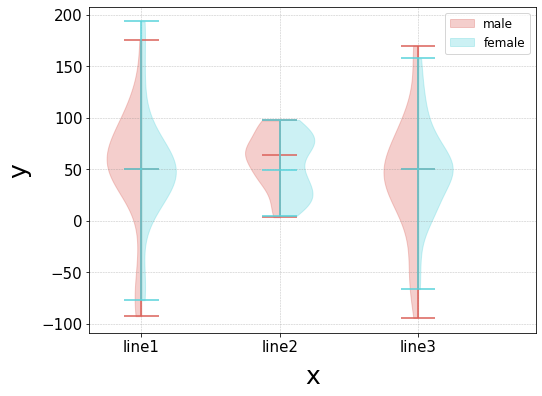

In [8]:
# category violin plot
avio=Violin_plot()
avio.Violin('4.xlsx',x_col_name=['line1','line2','line3'],category='gender',x_label='x',y_label='y',paper_type='single')

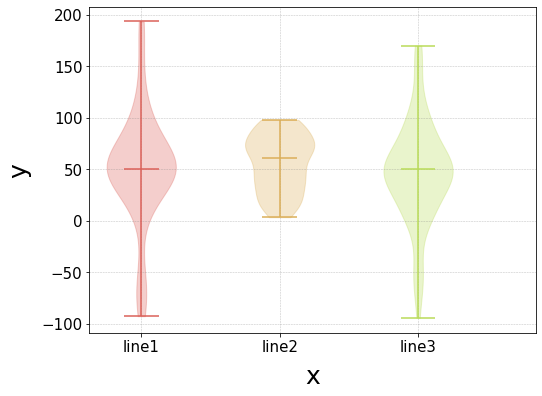

In [9]:
# simple violin plot
avio=Violin_plot()
avio.Violin('4.xlsx',x_col_name=['line1','line2','line3'],x_label='x',y_label='y',paper_type='single')